In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# create a set of random long lat combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
#unpack zip into list
coordinates = list(lat_lngs)

In [9]:
# use print function to display the lat and long combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-51.81436825214765 -6.30163040047681
88.12714175363953 61.54738157127727
65.85379124056416 -67.76083569135773
-45.154328657647866 82.23195348015307
36.86328699415256 49.869521143776666
-44.11185578005617 -21.246258117268553
46.91032222913333 78.42132037374682
-56.3765468596595 45.7611734152249
-44.15266261126364 -82.40789203285497
-54.773978684476134 46.16416225222258
4.842938994791169 -36.039007306832126
13.984636721932446 -20.321926695759657
-72.82115102869682 78.41990357778863
82.0813798317244 42.86095374830083
7.497385437319721 29.83142988717904
-69.66744135178409 4.9330130283338605
-43.644655197837935 48.71266919494275
80.34478705090095 -7.791770298234496
-14.509338859093148 -71.41734701672812
6.744520621403467 -15.472267084624576
87.19022789906703 71.06000850293569
-85.37040779740187 -59.016048364177195
-23.733898726793768 -82.03490498156806
77.56683110689497 55.10345394052371
13.210460665574118 -58.402039273346325
-32.665194597298424 -66.82756428532295
70.84097257670592 80.49920

5.027863370859677 -6.032224620904088
-3.727597377184196 -62.50074963841888
-35.396900628931924 -53.68686805237984
81.14163678708883 -28.600973210562394
59.82206563665983 -34.393162966160425
-3.5721939653145967 -45.25634238855379
-42.257652997914555 2.033676888842521
83.43063465420354 -14.984186471724456
-62.70664649997241 -13.930087235588758
37.002308831169145 -42.73921353192678
6.135469087964694 70.0779629449626
-54.72902402522142 -83.3071847048658
-76.91567566483968 -10.567831699613677
-9.12724452081531 -52.922061697583146
74.32640219567594 -45.996942623173126
-65.95004050354143 43.77373641393126
-17.622232175382536 -41.69584944930407
-17.90206243316949 0.6212882101807935
49.764656772883285 70.90013209091606
44.67827933960166 -4.643543465882303
45.770622170206565 4.750373183744145
-88.13990509185953 31.206014165840386
30.415618288586302 69.84032774397562
-80.71657870160533 -32.37048053537748
-57.82807185129568 -2.497641769906849
69.16933834615466 -68.48026714769179
0.349667840492458 

In [10]:
#import citipy
from citipy import citipy


In [11]:
# create list to hold cities closest to coordinates
cities = []

# identify nearest city to lat long combos
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then add to list
    if city not in cities:
        cities.append(city)

#print city count
len(cities)

603

In [12]:
#import requests library
import requests

#import API key
from config import weatherAPI_key


In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherAPI_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9eae8ae74d90e1ab199dc83caac75f4b


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
#create empty list to hold weather data
city_data = []

#print the start of logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#run api request for each city

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | lahijan
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | ushtobe
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | itarema
Processing Record 11 of Set 1 | dakar
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | ler
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | sicuani
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | ushuaia


Processing Record 33 of Set 4 | segezha
Processing Record 34 of Set 4 | nuuk
Processing Record 35 of Set 4 | mrirt
City not found. Skipping...
Processing Record 36 of Set 4 | paulo ramos
Processing Record 37 of Set 4 | praia da vitoria
Processing Record 38 of Set 4 | viedma
Processing Record 39 of Set 4 | makhu
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | vertientes
Processing Record 43 of Set 4 | eydhafushi
Processing Record 44 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 45 of Set 4 | pangody
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | medvedevo
Processing Record 48 of Set 4 | sao felix do xingu
Processing Record 49 of Set 4 | brae
Processing Record 50 of Set 4 | bamako
Processing Record 1 of Set 5 | galle
Processing Record 2 of Set 5 | tutayev
Processing Record 3 of Set 5 | road town
Processing Record 4 of Set 5 | tatawin
Processing Record 5 of Set 5 | la

Processing Record 24 of Set 8 | alenquer
Processing Record 25 of Set 8 | andros
Processing Record 26 of Set 8 | mikhaylovsk
Processing Record 27 of Set 8 | alta floresta
Processing Record 28 of Set 8 | sinnamary
Processing Record 29 of Set 8 | canoinhas
Processing Record 30 of Set 8 | lodja
Processing Record 31 of Set 8 | ibotirama
Processing Record 32 of Set 8 | sao miguel do araguaia
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | tambul
City not found. Skipping...
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | phalombe
Processing Record 37 of Set 8 | robertsport
Processing Record 38 of Set 8 | arlit
Processing Record 39 of Set 8 | guaraniacu
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | ardu
Processing Record 42 of Set 8 | antofagasta
Processing Record 43 of Set 8 | richards bay
Processing Record 44 of Set 8 | camacha
Processing Record 45 of Set 8 | bafra
Processing Record 46 of Set 8 | qasigiannguit


Processing Record 15 of Set 12 | itanhem
Processing Record 16 of Set 12 | bell ville
Processing Record 17 of Set 12 | diplo
Processing Record 18 of Set 12 | kangaatsiaq
Processing Record 19 of Set 12 | macau
Processing Record 20 of Set 12 | miranorte
City not found. Skipping...
Processing Record 21 of Set 12 | grao mogol
Processing Record 22 of Set 12 | nahariyya
Processing Record 23 of Set 12 | svarstad
Processing Record 24 of Set 12 | oussouye
Processing Record 25 of Set 12 | awbari
Processing Record 26 of Set 12 | dabat
Processing Record 27 of Set 12 | mbuji-mayi
Processing Record 28 of Set 12 | turkmenabat
Processing Record 29 of Set 12 | zarand
Processing Record 30 of Set 12 | morros
Processing Record 31 of Set 12 | mondlo
Processing Record 32 of Set 12 | dombas
Processing Record 33 of Set 12 | viligili
City not found. Skipping...
Processing Record 34 of Set 12 | christiana
Processing Record 35 of Set 12 | puerto colombia
Processing Record 36 of Set 12 | boddam
Processing Record 3

In [16]:
#convert array to panda df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,24,ZA,2022-10-12 15:05:48,71,-33.9258,18.4232,71.11,14.00
1,Pangnirtung,6,CA,2022-10-12 15:05:48,68,66.1451,-65.7125,20.21,2.42
2,Mahebourg,75,MU,2022-10-12 15:05:49,73,-20.4081,57.7000,72.25,11.50
3,Lahijan,61,IR,2022-10-12 15:05:49,81,37.2061,50.0029,71.38,4.14
4,Arraial Do Cabo,40,BR,2022-10-12 15:05:49,73,-22.9661,-42.0278,78.66,10.36
5,Ushtobe,3,KZ,2022-10-12 15:05:50,27,45.2514,77.9838,54.09,9.04
6,East London,100,ZA,2022-10-12 15:05:50,80,-33.0153,27.9116,71.73,12.62
7,Castro,100,BR,2022-10-12 15:01:34,77,-24.7911,-50.0119,67.91,8.81
8,Itarema,40,BR,2022-10-12 15:05:19,45,-2.9248,-39.9167,90.64,18.32
9,Dakar,94,SN,2022-10-12 15:05:51,75,14.6937,-17.4441,90.48,10.11


In [17]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_d_df = city_data_df[column_order]

In [19]:
city_d_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-10-12 15:05:48,-33.9258,18.4232,71.11,71,24,14.00
1,Pangnirtung,CA,2022-10-12 15:05:48,66.1451,-65.7125,20.21,68,6,2.42
2,Mahebourg,MU,2022-10-12 15:05:49,-20.4081,57.7000,72.25,73,75,11.50
3,Lahijan,IR,2022-10-12 15:05:49,37.2061,50.0029,71.38,81,61,4.14
4,Arraial Do Cabo,BR,2022-10-12 15:05:49,-22.9661,-42.0278,78.66,73,40,10.36
5,Ushtobe,KZ,2022-10-12 15:05:50,45.2514,77.9838,54.09,27,3,9.04
6,East London,ZA,2022-10-12 15:05:50,-33.0153,27.9116,71.73,80,100,12.62
7,Castro,BR,2022-10-12 15:01:34,-24.7911,-50.0119,67.91,77,100,8.81
8,Itarema,BR,2022-10-12 15:05:19,-2.9248,-39.9167,90.64,45,40,18.32
9,Dakar,SN,2022-10-12 15:05:51,14.6937,-17.4441,90.48,75,94,10.11


In [21]:
#output csv file
output_data_file = "weather_data/cities.csv"
#export city data to csv
city_d_df.to_csv(output_data_file, index_label="City_ID")


In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_d_df["Lat"]
max_temps = city_d_df["Max Temp"]
humidity = city_d_df["Humidity"]
cloudiness = city_d_df["Cloudiness"]
wind_speed = city_d_df["Wind Speed"]

In [23]:
#import time module
import time
#get todays date in seconds
today = time.time()
today

1665588248.0330892

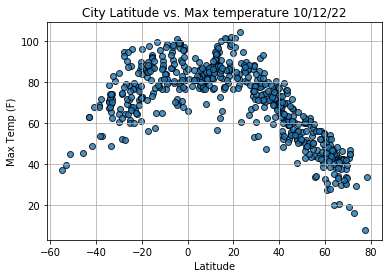

In [24]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Max temperature " + time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

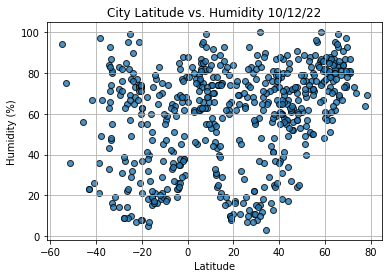

In [25]:
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

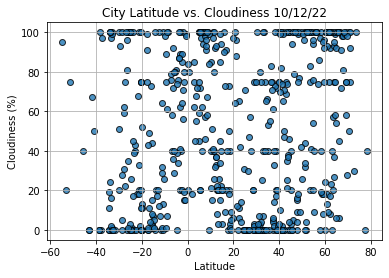

In [26]:
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

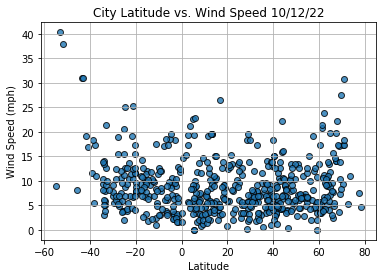

In [27]:
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
northern_hemi_df = city_d_df.loc[(city_d_df["Lat"]>=0)]
southern_hemi_df = city_d_df.loc[(city_d_df["Lat"]<0)]

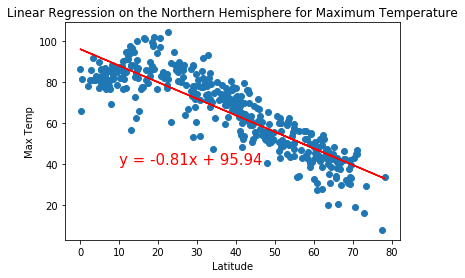

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

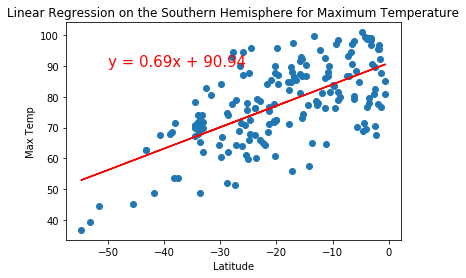

In [38]:
# lin reg for Southern Hemi
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
#call function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

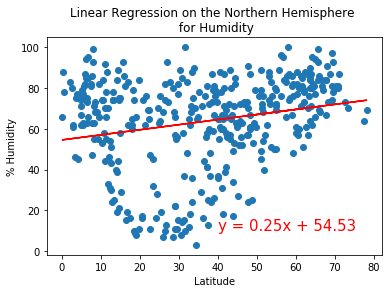

In [39]:
# humidity in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity', '% Humidity', (40,10))

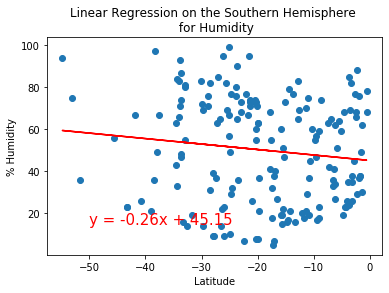

In [40]:
# lin reg on southern hemi 4 humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity', (-50,15))

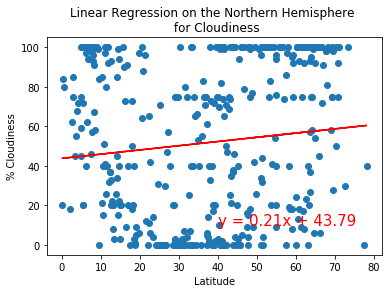

In [41]:
#cloudiness in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Cloudiness', '% Cloudiness', (40,10))

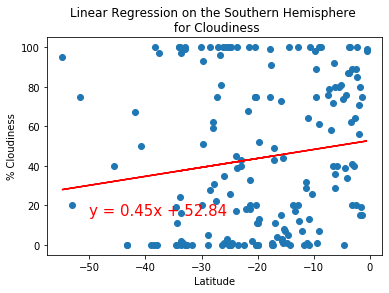

In [42]:
# lin reg on southern hemi 4 clooud
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Cloudiness', '% Cloudiness', (-50,15))

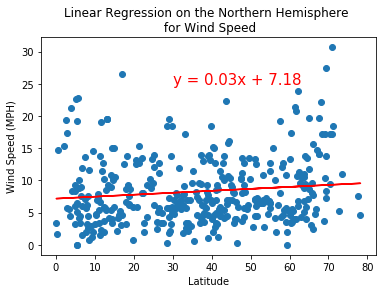

In [44]:
#Wind Speed in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)', (30,25))

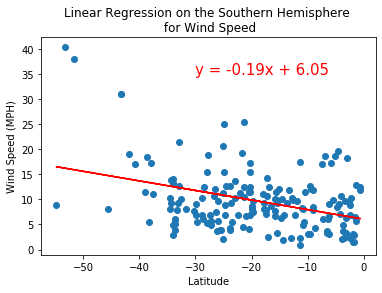

In [46]:
# lin reg on southern hemi 4 wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)', (-30,35))